## LOAN_APPROVED DATASET

### Feature Datatypes
1. Loan_ID-(Nominal-String) 
2. Gender-(Nominal-String)
3. Married-(Nomainal-String)
4. Dependents-(Categorical-Ordinal)
5. Education-(Nominal-String)
6. Self_Employed-(Nominal-String)
7. ApplicantIncome-(Continuous-Numeric)
8. CoapplicantIncome-(Continuous-Numeric)
9. LoanAmount-(Continuous-Numeric)
10. Loan_Amount_Term-(Discrete)
11. Credit_History-(Nominal-boolean)
12. Property_Area  (Nominal-String)             
13. Loan_Status (Approved)      (Nominal)

In [1]:
import pandas as pd
df=pd.read_csv('loan_approved.csv')
print(df.info())
print(df.nunique())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Loan_ID                   614
Ge

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
df.isnull().sum()



Loan_ID              0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
PA_Semiurban         0
PA_Urban             0
GEN_Male             0
MARR_Yes             0
EDU_Not Graduate     0
EMP_Yes              0
LS_Y                 0
dtype: int64

In [3]:
cat_cols = df.select_dtypes(include=['object']).columns

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [4]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [5]:
li=df['Loan_ID'].unique()
print("Categories of Loan_id : ..",li[0])
print("Length:",len(li))
gl=df['Gender'].unique()
print("Categories of Gender : ",gl)
print("Length:",len(gl))
dl=df['Dependents'].unique()
print("Categories of Dependents : ",dl)
print("Length:",len(dl))
al=df['ApplicantIncome'].unique()
# print("Categories of Gender : ",coal)
print("Length of Applicant income:",len(al))
coal=df['CoapplicantIncome'].unique()
# print("Categories of Gender : ",coal)
print("Length of coapplicant income:",len(coal))
lm=df['LoanAmount'].unique()
# print("Categories of Gender : ",coal)
print("Length of Loan Amount:",len(lm))

Categories of Loan_id : .. LP001002
Length: 614
Categories of Gender :  ['Male' 'Female']
Length: 2
Categories of Dependents :  ['0' '1' '2' '3+']
Length: 4
Length of Applicant income: 505
Length of coapplicant income: 287
Length of Loan Amount: 203


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

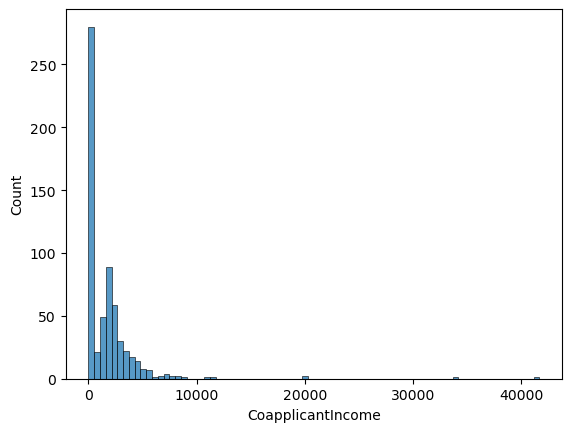

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.histplot(df['CoapplicantIncome'])



<Axes: xlabel='Dependents', ylabel='count'>

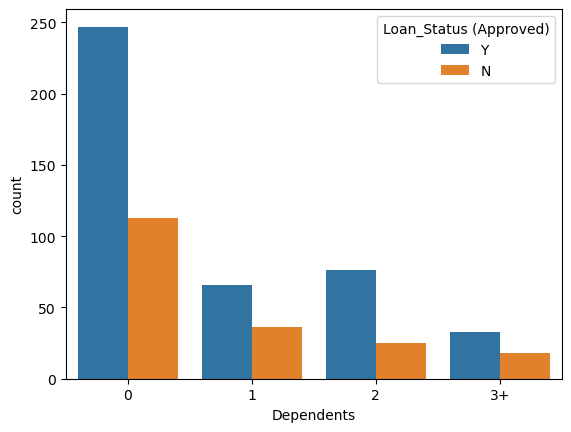

In [7]:
sns.countplot(x=df['Dependents'],hue='Loan_Status (Approved)',data=df)

<Axes: xlabel='Gender', ylabel='count'>

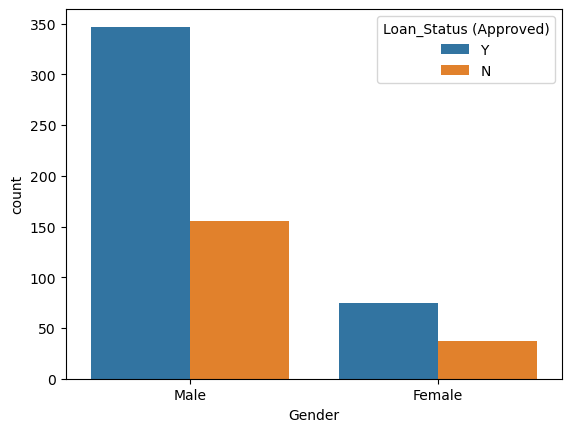

In [8]:
sns.countplot(x=df['Gender'],hue='Loan_Status (Approved)',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

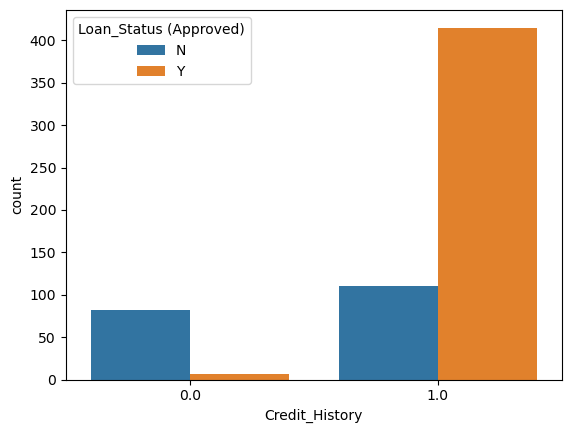

In [9]:
sns.countplot(x=df['Credit_History'],hue='Loan_Status (Approved)',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

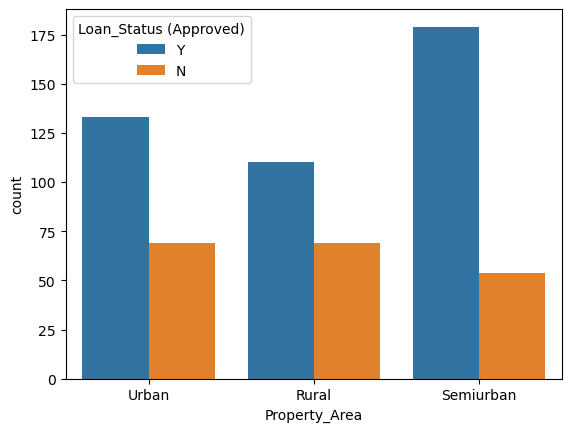

In [10]:
sns.countplot(x=df['Property_Area'],hue='Loan_Status (Approved)',data=df)

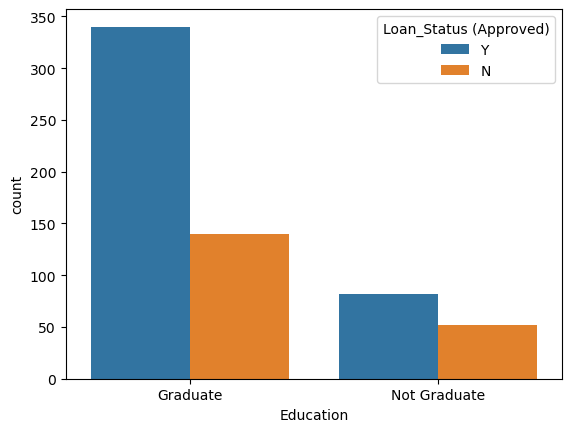

In [11]:
sns.countplot(x='Education', hue='Loan_Status (Approved)', data=df)
plt.show()


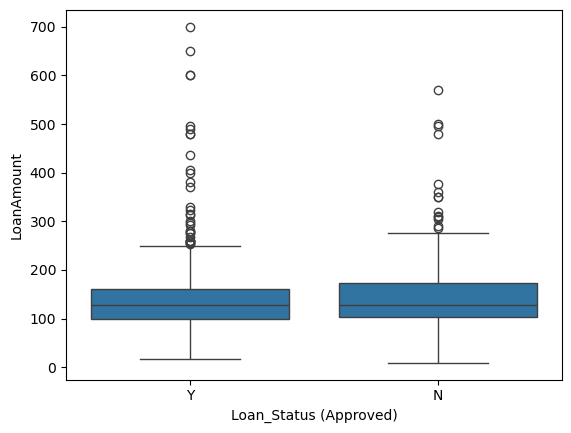

In [12]:
sns.boxplot(x='Loan_Status (Approved)', y='LoanAmount', data=df)
plt.show()


In [13]:

m=df['ApplicantIncome'].mean()
std=df['ApplicantIncome'].std()
f5=df['ApplicantIncome'].head(5)
z=[]
for i in range(len(f5)):
   z.append((f5[i] - m) / std)
print(z)


[np.float64(0.07293135984867927), np.float64(-0.13430245319192863), np.float64(-0.3934265653904138), np.float64(-0.4616860440933629), np.float64(0.09764882096173755)]


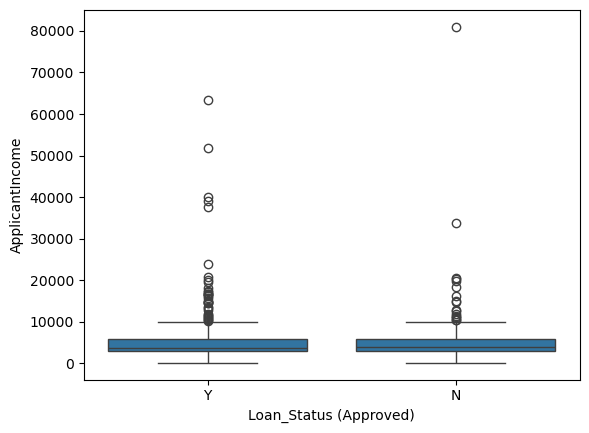

In [14]:
sns.boxplot(y='ApplicantIncome', x='Loan_Status (Approved)', data=df)
plt.show()

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

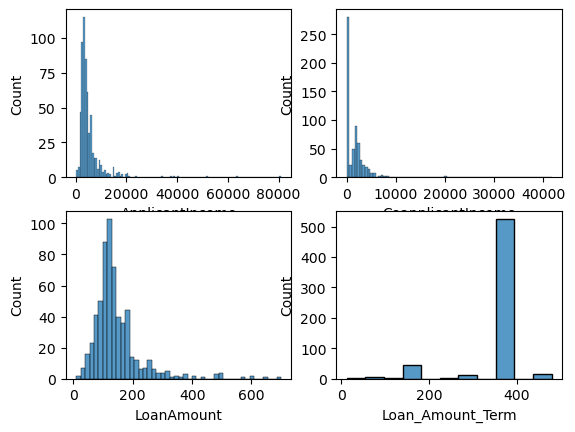

In [15]:
plt.subplot(2,2,1)
sns.histplot(df['ApplicantIncome'])
plt.subplot(2,2,2)
sns.histplot(df['CoapplicantIncome'])
plt.subplot(2,2,3)
sns.histplot(df['LoanAmount'])
plt.subplot(2,2,4)
sns.histplot(df['Loan_Amount_Term'])

In [16]:
skew1=df['ApplicantIncome'].skew()
print("skewness of apllicant income:",skew1)
skew2=df['CoapplicantIncome'].skew()
print("skewness of coapplicant income:",skew2)
skew3=df['LoanAmount'].skew()
print("skewness of Loan Amount:",skew3)
skew4=df['Loan_Amount_Term'].skew()
print("skewness of Loan Amount term :",skew4)

kurt1=df['ApplicantIncome'].skew()
print("kurtosis of apllicant income:",kurt1)
kurt2=df['CoapplicantIncome'].skew()
print("kurtosis of coapplicant income:",kurt2)
kurt3=df['LoanAmount'].skew()
print("kurtosis of Loan Amount:",kurt3)
kurt4=df['Loan_Amount_Term'].skew()
print("kurtosis of Loan Amount term:",kurt4)

skewness of apllicant income: 6.539513113994625
skewness of coapplicant income: 7.491531216657306
skewness of Loan Amount: 2.743052748820892
skewness of Loan Amount term : -2.4021122563890396
kurtosis of apllicant income: 6.539513113994625
kurtosis of coapplicant income: 7.491531216657306
kurtosis of Loan Amount: 2.743052748820892
kurtosis of Loan Amount term: -2.4021122563890396


In [17]:
df['Property_Area'].unique()
df['Property_Area'].isna().sum()
df1=pd.get_dummies(df['Property_Area'],dtype=int,prefix='PA',drop_first=True)
df=pd.concat([df,df1],axis=1).drop('Property_Area',axis=1)


In [18]:
df['Gender'].unique()
df['Gender'].isna().sum()
df2=pd.get_dummies(df['Gender'],dtype=int,prefix='GEN',drop_first=True)
df=pd.concat([df,df2],axis=1).drop('Gender',axis=1)

In [19]:
df['Married'].unique()
df['Married'].isna().sum()
df3=pd.get_dummies(df['Married'],dtype=int,prefix='MARR',drop_first=True)
df=pd.concat([df,df3],axis=1).drop('Married',axis=1)

In [20]:
df['Education'].unique()
df['Education'].isna().sum()
df4=pd.get_dummies(df['Education'],dtype=int,prefix='EDU',drop_first=True)
df=pd.concat([df,df4],axis=1).drop('Education',axis=1)

In [21]:
df['Self_Employed'].unique()
N=df['Self_Employed'].isna().sum()
df5=pd.get_dummies(df['Self_Employed'],dtype=int,prefix='EMP',drop_first=True)
df=pd.concat([df,df5],axis=1).drop('Self_Employed',axis=1)

In [22]:
df['Loan_Status (Approved)'].unique()
df['Loan_Status (Approved)'].isna().sum()
df6=pd.get_dummies(df['Loan_Status (Approved)'],dtype=int,prefix='LS',drop_first=True)
df=pd.concat([df,df6],axis=1).drop('Loan_Status (Approved)',axis=1)

In [23]:
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,PA_Semiurban,PA_Urban,GEN_Male,MARR_Yes,EDU_Not Graduate,EMP_Yes,LS_Y
0,LP001002,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,0,1,1,1,0,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,1,1,1,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,0,0,1,1,0,0,1
611,LP002983,1,8072,240.0,253.0,360.0,1.0,0,1,1,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,0,1,1,1,0,0,1


In [24]:
df.shape[1]


14

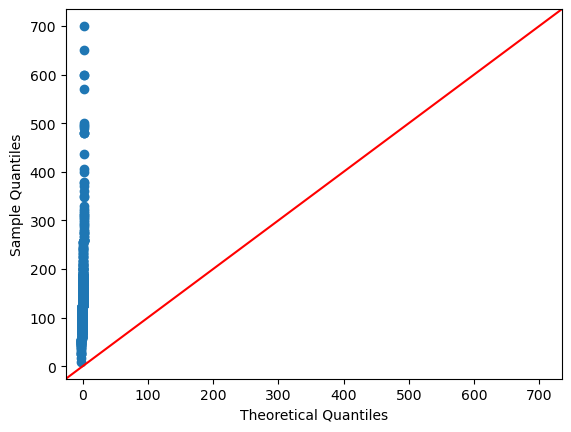

In [28]:
import statsmodels.api as sm
import pylab as py

sm.qqplot(df['LoanAmount'],line='45')
py.show()

In [37]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson')
la_trans=trans.fit_transform(df[['LoanAmount']])
df['LoanAmount']=la_trans
la_trans.shape

(614, 1)

In [35]:
print("Skewness:",pd.Series(la_trans.reshape(614,)).skew())
print("Kurtosis:",pd.Series(la_trans.reshape(614,)).kurtosis())

Skewness: 0.02083110923009167
Kurtosis: 2.4535382601295623


<Axes: xlabel='LoanAmount', ylabel='Count'>

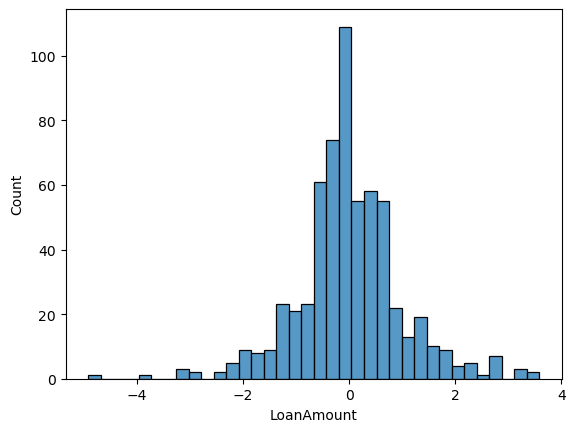

In [38]:
sns.histplot(df['LoanAmount'])

Skewness of applicantincome: -0.26448955430139487
Kurtosis: 5.323045797726275


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

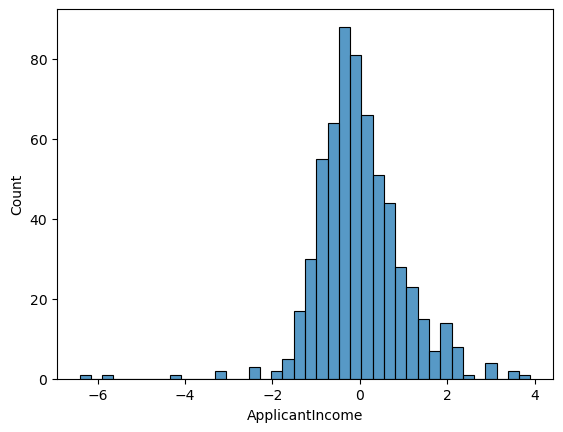

In [45]:
df['ApplicantIncome']=trans.fit_transform(df[['ApplicantIncome']])
print("Skewness of applicantincome:",df['ApplicantIncome'].skew())
print("Kurtosis:",df['ApplicantIncome'].kurtosis())
sns.histplot(df['ApplicantIncome'])


Skewness of applicantincome: -0.10269822028656443
Kurtosis: -1.8166882757468887


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

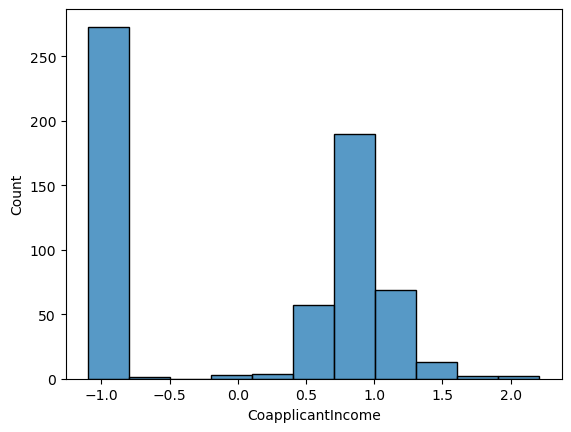

In [46]:
df['CoapplicantIncome']=trans.fit_transform(df[['CoapplicantIncome']])
print("Skewness of applicantincome:",df['CoapplicantIncome'].skew())
print("Kurtosis:",df['CoapplicantIncome'].kurtosis())
sns.histplot(df['CoapplicantIncome'])

seaborn
plots
statistics 
types of data analysis
types of data
encoding techniques
sampling methods


dataset-apply all the methodss